# Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data set and find its shape

In [2]:
df = pd.read_csv("House Demolitions in Palestine.csv")
df.head(10)

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN
5,2021.0,6,20,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Nablus,Demolition on the pretext of unlawful construc...,NaN
6,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Qalqiliya,Demolition on the pretext of unlawful construc...,NaN
7,2021.0,41,80,45,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Tubas,Demolition on the pretext of unlawful construc...,NaN
8,2021.0,14,29,14,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
9,2021.0,8,27,15,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Owners


In [3]:
#see the shape of data
df.shape
#Data has 272 rows and 10 colums

(272, 10)

In [4]:
#name of columns
df.columns

Index(['Year', 'Housing Units', 'People Left Homeless', 'Minors Left Homeless',
       'Area', 'Type of Structure', 'Demolish Scope', 'District',
       'Demolition Reason', 'Demolition carried out by'],
      dtype='object')

In [5]:
df.isna().sum()

Year                           3
Housing Units                  2
People Left Homeless           2
Minors Left Homeless           3
Area                           3
Type of Structure              3
Demolish Scope               175
District                       3
Demolition Reason              3
Demolition carried out by    220
dtype: int64

In [6]:
data = df.drop(['Demolition carried out by','Demolish Scope'],axis=1)


In [7]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  269 non-null    float64
 1   Housing Units         270 non-null    object 
 2   People Left Homeless  270 non-null    object 
 3   Minors Left Homeless  269 non-null    object 
 4   Area                  269 non-null    object 
 5   Type of Structure     269 non-null    object 
 6   District              269 non-null    object 
 7   Demolition Reason     269 non-null    object 
dtypes: float64(1), object(7)
memory usage: 17.1+ KB


In [8]:
data[['Housing Units','People Left Homeless','Minors Left Homeless']]= data[['Housing Units','People Left Homeless','Minors Left Homeless']].apply(pd.to_numeric,errors='coerce')

In [9]:
data = data.dropna(axis=0,how='any')

# Can you visualize the damage and map it geographically?
Demolished by Year
Demolished by Area
Graph by Affectees
Demolish reason

In [10]:
# House demolish data by year
data_by_year = data.groupby(['Year'], as_index=False).sum()


Text(0.5, 1.0, 'Houses Demolished by Year')

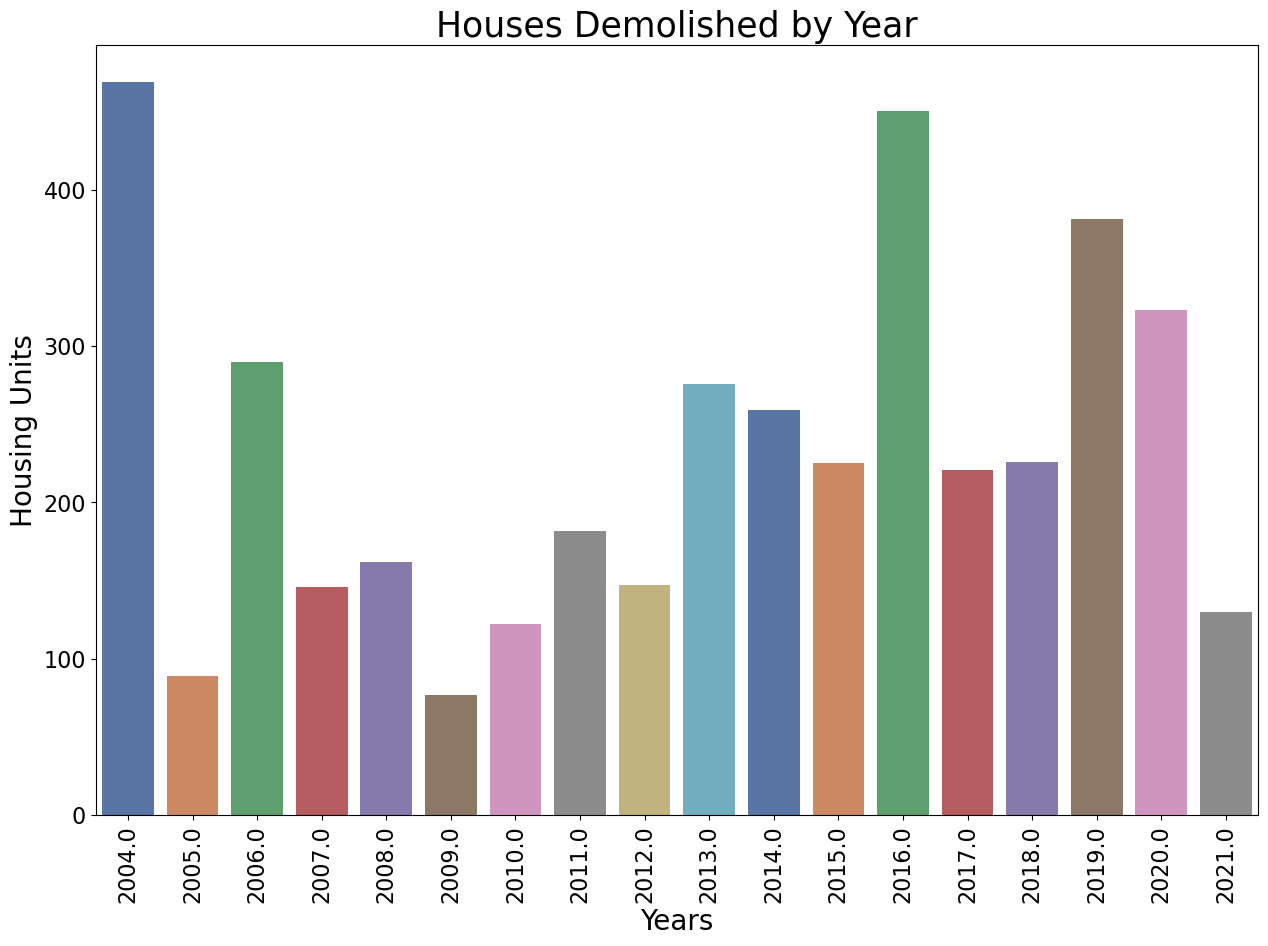

In [11]:
#create chart by year
plt.figure(figsize= (15,10))
x = data_by_year['Year']
y = data_by_year['Housing Units']
sns.barplot(x= x, y=y, palette='deep')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Housing Units',fontsize=20)
plt.title('Houses Demolished by Year',fontsize=25)

In [53]:
#Demolished by Area
data_by_areas = data['District'].value_counts()
data_by_areas = pd.DataFrame(data_by_areas).reset_index()
dict = {'index':'District', 'District':'Qty'}
data_by_areas.rename(columns=dict,inplace=True)
data_by_areas



,District,Qty
0,East Jerusalem,58
1,Ramallah and al-Bira,25
2,Jenin,21
3,Nablus,21
4,Al-Quds,18
5,Bethlehem,18
6,Hebron,15
7,Tubas,15
8,Jericho,14
9,Qalqiliya,13


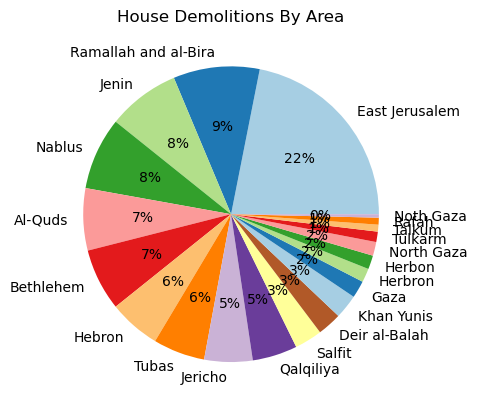

In [54]:
palette_color = sns.color_palette("Paired")
plt.pie(data_by_areas['Qty'],labels=data_by_areas['District'],colors=palette_color, autopct='%.0f%%')
plt.title('House Demolitions By Area')
plt.show()


In [14]:
data_by_affectees = data.groupby(['Year'], as_index=False).sum()
data_by_affectees

,Year,Housing Units,People Left Homeless,Minors Left Homeless
0,2004.0,469.0,2457.0,110.0
1,2005.0,89.0,214.0,78.0
2,2006.0,290.0,1355.0,96.0
3,2007.0,146.0,668.0,340.0
4,2008.0,162.0,772.0,422.0
5,2009.0,77.0,502.0,207.0
6,2010.0,122.0,612.0,302.0
7,2011.0,182.0,979.0,463.0
8,2012.0,147.0,633.0,326.0
9,2013.0,276.0,838.0,451.0


<Figure size 1500x1000 with 0 Axes>

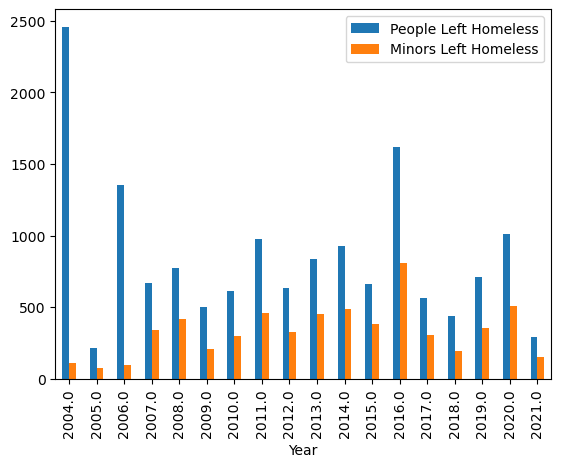

In [49]:
#create chart by Afectees
plt.figure(figsize=(15,10))
data_by_affectees.plot(x='Year',y=['People Left Homeless','Minors Left Homeless'],kind='bar')
plt.show()


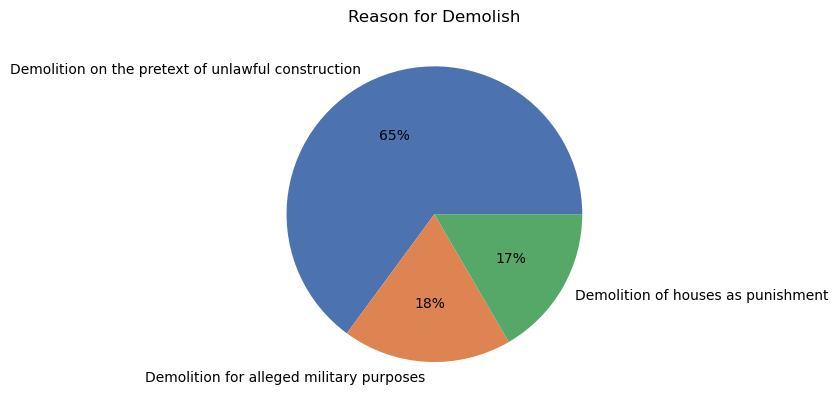

In [48]:
demolish_reason = data['Demolition Reason'].value_counts().reset_index()
dict1 = {'index':'Demolition Reason','Demolition Reason':'Qty'}
demolish_reason.rename(columns=dict1,inplace=True)
palette_color = sns.color_palette("deep")
plt.pie(demolish_reason['Qty'],labels=demolish_reason['Demolition Reason'],colors=palette_color, autopct='%.0f%%')
plt.title('Reason for Demolish')
plt.show()